# HW_2: SVM, KNN

### Задание 0. Импорт и анализ датасета Iris

In [196]:
from sklearn.datasets import load_iris
# Download dataset
data, labels = load_iris(return_X_y=True)
print("data:", data)
print("labels:", labels)

data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

И `data`, и `labels` - это N-мерные массивы. **Посмотрите какие у них размеры**

In [197]:
print(data.shape)
print(labels.shape)

(150, 4)
(150,)


Видим, что массив `data` состоит из нескольких колонок. Такие колонки мы называем *features*. Набор данных по ирисам содержит четыре характеристики (длина чашелистиков, ширина чашелистиков, длина лепестков, ширина лепестков) 50 образцов трех видов ирисов (setosa, virginica и  versicolor). Вид ирисов отражен в массиве `labels`.

**Отфильтруйте массив `data` таким образом, что бы он содержал в себе только ирисы из класса `0`**. Для этого используйте конструкцию `labels == class` в качестве индекса для `data`

In [198]:
data_0 = data[labels == 0]
data_1 = data[labels == 1]
data_2 = data[labels == 2]

К сожалению, когда данных много, просто смотреть на цифры крайне не информативно.

Для визуализации данных в этом курсе мы будем использовать библиотеку `matplotlib`. **Давайте ее импортируем**

In [199]:
import matplotlib.pyplot as plt

**Постройте на одном рисунке график** признака с **индексом 0** (sepal length in cm) для каждого из **3 классов** (3 графика на одном рисунке). Для построения графика используйте функцию `plt.plot()`. Для того что бы получить доступ ко всем объектам в позиции 0 используйте index notation `[:, 0]`.

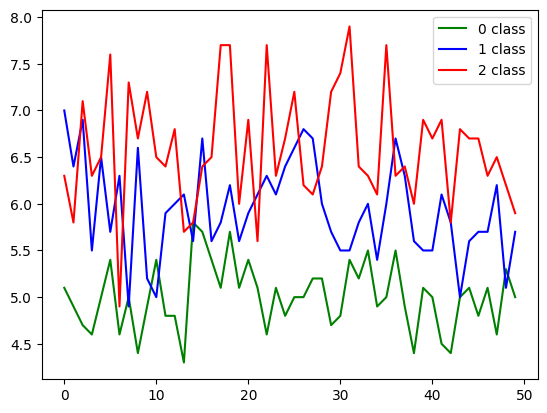

In [200]:
plt.plot(data_0[:,0], color='green')
plt.plot(data_1[:,0], color='blue')
plt.plot(data_2[:,0], color='red')
plt.legend(['0 class','1 class','2 class'])

**Для каждого класса постройте зависимость ширины от длины чашелистиков**. Используйте `ax.scatter()`

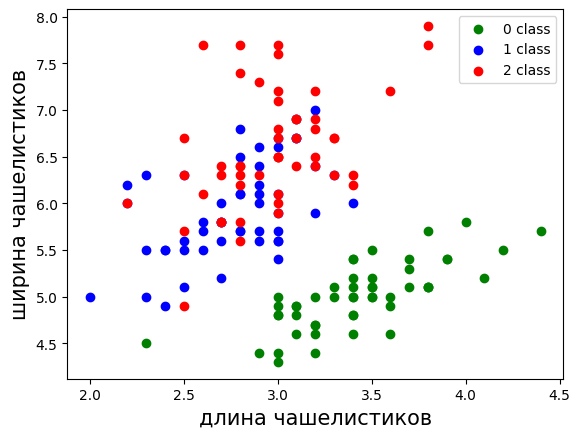

In [201]:
fig, ax = plt.subplots()

ax.scatter(data_0[:,1], data_0[:,0], c='green')
ax.scatter(data_1[:,1], data_1[:,0], c='blue')
ax.scatter(data_2[:,1], data_2[:,0], c='red')

plt.legend(['0 class','1 class','2 class'])
ax.set_xlabel("длина чашелистиков", fontsize=15)
ax.set_ylabel("ширина чашелистиков", fontsize=15)

plt.show()

## KNN

### Задание 1. Алгоритм Nearest Neighbors.



Хотя в лекции дан пример для изображений, реализация для табличных данных будет проще, либо вообще может не отличаться от предложенной.

P.S. Nearest Neighbor это  K-Nearest Neighbors при K = 1

Разбейте ваши данные на тренировочный и тестовый набор при помощи метода `train_test_split()`. Используйте следующие аргументы `train_size=0.6`, `random_state=42`, `stratify=labels`

In [202]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.6, random_state=42, stratify=labels)
print("x_train", x_train.shape)
print("x_test", x_test.shape)

x_train (90, 4)
x_test (60, 4)


Напишите функцию, которая считает расстояние L1 между 2мя векторами


In [203]:
import numpy as np

def compute_L1(a, b):
    r = abs(a-b)
    return sum(r)
#checking
a = np.array([1,2,3,4])
b = np.array([2,1,3,4])
compute_L1(a, b)

2

Возьмите первую строку из тестового набора. Посчитайте расстояние L1 от нее до всех строк тренировочного набора.

В простейшем виде напишите `for loop`, если вы знаете что вы делаете - можете использовать *векторизацию*

In [204]:
# Your code here
distances = np.array([compute_L1(x_test[0,:], b) for b in x_train])
distances

array([ 9.5,  0.6,  5.3,  5.2,  0.5,  0.9,  0.6,  1.4,  8.5,  8.1,  0.8,
        8.3,  4.5,  8.7,  5. ,  6.3,  0.8,  0.9,  6.9,  1.9,  0.2,  6.6,
        7.5,  6.1,  1. ,  6.8,  0.8,  6. ,  8.2,  0.3,  5.1,  0.9,  6.7,
        0.9, 11.2,  7. ,  7.1,  6. ,  1. ,  7. , 10. ,  6.7,  1.7, 10.2,
        7.1,  0.5,  4.4,  0.3,  4.7,  5.7,  6.9,  8.6,  4.5,  8.4,  5.3,
        7.8,  0.8,  9.3,  7.6,  6.2,  7.1,  7.1, 10.3,  1.2,  7.7,  1. ,
        7.7,  1.1,  1.6,  8.7, 10. ,  1.3,  6.9,  7.3,  7.4,  0.8,  5.4,
        6.7,  5.5,  4.9,  8.2,  0.5,  4.7,  7.2,  4.9,  0.5,  5.2,  1.4,
        5.2,  1.1])

Найдите индекс минимального расстояния

Используйте `np.argmin()`

In [205]:
indx = np.argmin(distances)
print(indx)

20


Выведете на экран свойства первого ириса в тестовом наборе и ириса, который максимально на него похож в тренировочном(минимальное расстояние)

In [206]:
print("x_test:", x_test[0,:])
print("x_train:", x_train[20,:])

x_test: [5.  3.5 1.3 0.3]
x_train: [5.1 3.5 1.4 0.3]


Выведите их метки

In [207]:
print('first iris in test labels', y_test[0])
print('most similar iris in train labels', y_train[20])

first iris in test labels 0
most similar iris in train labels 0


Посчитайте двумерный массив расстояний от каждого ириса в тестовом наборе до каждого ириса в тренировочном. Размерность массива должна получиться (60, 90)

In [208]:
def compute_distances(train, test, distance_func):
    distances = [0]*test.shape[0]
    for i in range(test.shape[0]):
      distances[i] = np.array([distance_func(test[i,:], b) for b in train])
    return distances
distances = np.array(compute_distances(x_train, x_test, compute_L1))
print(distances.shape)

(60, 90)


Определите точность Nearest Neighbors классификации

Для этого найдите индекс минимального значения для каждой строки массива distances

In [209]:
indx_distances = np.array([np.argmin(b) for b in distances])

Теперь создадим массив `predicted_class`

In [210]:
predicted_class = y_train[indx_distances]

И посмотрим где класс предсказан правильно, а где нет

In [211]:
y_test == predicted_class

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

**Посчитайте точность (accuracy)**

В питоне с булевыми значениями можно производить математические операции (True = 1, False = 0)

In [212]:
accuracy = (len(y_test) - np.sum(np.abs(predicted_class-y_test)))/len(y_test)
print(f'Accuracy = {accuracy * 100:.1f}%')

Accuracy = 93.3%


Повторите все этапы классификации, однако в этот раз стандартизируйте данные перед этим.

In [213]:
def standartize(data):
    mean = np.mean(data)
    std = np.std(data)
    st_data = (data-mean)/std
    return st_data
x_train_st, x_test_st = np.array([standartize(b) for b in x_train.T]).T, np.array([standartize(b) for b in x_test.T]).T

In [214]:
distances_st = np.array(compute_distances(x_train_st, x_test_st, compute_L1))
indx_distances_st =np.array([np.argmin(dist) for dist in distances_st])
min_distances = y_train[indx_distances_st]
predicted_class = min_distances#y_train_st[indx_distances_st]
accuracy =  (len(y_test) - np.sum(np.abs(predicted_class-y_test)))/len(y_test)
print(f'Accuracy = {accuracy * 100:.1f}%')

Accuracy = 95.0%


### Формат результата

Получить точность (accuracy) больше 94%

### Задание 2. Nearest Neighbors для картинок

Загрузим датасет с помощью функций torchvision, пока можно не очень вдумываться как это работает, дальше в курсе мы познакомимся с PyTorch значительно ближе

In [215]:
from torchvision import datasets
import numpy as np

dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(dataset.data / 255,  # Normalize
                                      np.array(dataset.targets),
                                      train_size=0.1, # get only fraction of the dataset
                                      random_state=42,
                                      stratify=dataset.targets)


Files already downloaded and verified


Посмотрим что это за датасет такой

In [216]:
data.shape

(5000, 32, 32, 3)

CIFAR - 4х мерный массив (N, W, H, C). $N$ - количество картинок, $W$ - ширина картинки, $H$ - высота картинки, $C$ - количество каналов (RGB).

Создайте subplots с 2мя строками и 2мя колонками и отобразите 4 любых картинки из `data`.
Используйте `plt.imshow()`

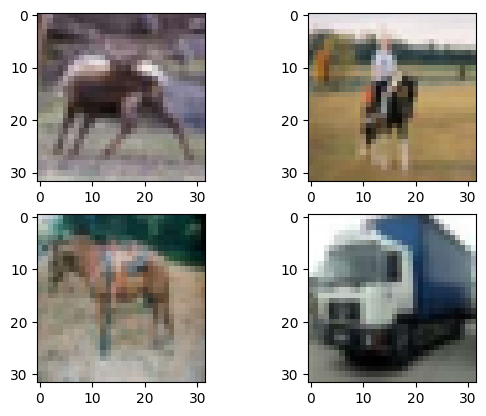

In [217]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0, 0].imshow(data[0])# Your code here
ax[0, 1].imshow(data[1])# Your code here
ax[1, 0].imshow(data[2])# Your code here
ax[1, 1].imshow(data[-1])# Your code here
plt.show()

Разбейте датасет на тренировочный и тестовый наборы. Укажите аргументы `random_state=42`, `stratify=labels`

In [218]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.6, random_state=42, stratify=labels)

print("x_train", x_train.shape)
print("x_test", x_test.shape)

x_train (3000, 32, 32, 3)
x_test (2000, 32, 32, 3)


Возьмите первую картинку из тестового набора и найдите ее ближайшего соседа из тренировочного

In [219]:
xtr = np.array([x_train[i].flatten() for i in range(len(x_train))]) # Xtr станет  3000 x 3072
xte = np.array([x_test[i].flatten() for i in range(len(x_test))]) # Xte станет 2000 x 3072
distances = np.array([compute_L1(xte[0,:], b) for b in xtr])
indx = np.argmin(distances)
print(indx)

561


**Отобразите эти картинки на subplots с ncols=2**

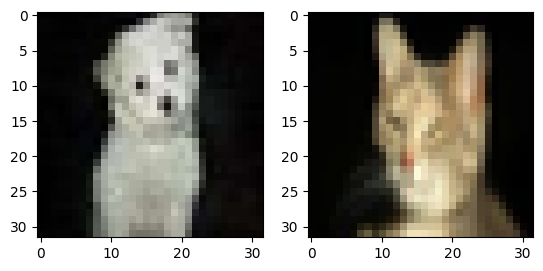

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(x_test[0])
ax[1].imshow(x_train[indx])
plt.show()

**Посмотрите какой класс предсказывается**

In [221]:
class_pred = y_test[indx]
print(class_pred)

8


Возьмите первую картинку из тестового набора и найдите K ее ближайших соседей (KNN) из тренировочного

In [222]:
k = 5
distances = np.array([compute_L1(xte[0,:], b) for b in xtr])
indx = np.argsort(distances)[:k]
print(indx)

[ 561  445 2380  793 1928]


Отобразите ближайших соседей в виде subplots

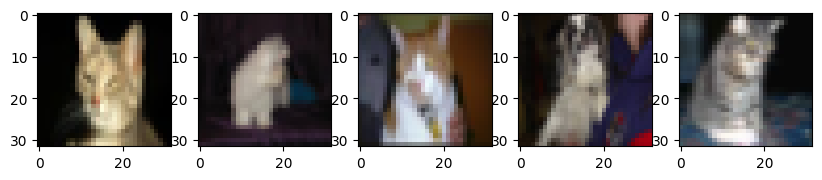

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
ax[0].imshow(x_train[indx[0]])
ax[1].imshow(x_train[indx[1]])
ax[2].imshow(x_train[indx[2]])
ax[3].imshow(x_train[indx[3]])
ax[4].imshow(x_train[indx[4]])
plt.show()

Посчитайте KNN для всего датасета

Чем больше данных - тем дольше процесс. Реализуйте функцию для расчета расстояний. Если вы используете `for loops` - сделайте к ним *progress bars* с помощью [tqdm](https://github.com/tqdm/tqdm)

Примечание: если используете вложенные циклы используйте `tqdm` только на внешнем цикле. Иначе время работы существенно увеличится.

In [224]:
from tqdm.notebook import tqdm

In [225]:
def compute_distances(train, test, distance_func):
    distances = [0]*test.shape[0]
    for i in tqdm(range(test.shape[0])):
      distances[i] = np.array([distance_func(test[i,:], b) for b in train])
    return distances
distances = np.array(compute_distances(xtr, xte, compute_L1))

  0%|          | 0/2000 [00:00<?, ?it/s]

Теперь найдите k ближайших соседей и предскажите класс. [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html)

In [226]:
from scipy.stats import mode
indxs = np.array([np.argsort(distance)[:k] for distance in distances])
pred = mode(y_train[indxs], axis=1)[0].flatten()
print('predicted class is',pred)
def get_accuracy(distances, train_labels, test_labels, k):
    indxs = np.array([np.argsort(distance)[:k] for distance in distances])
    pred = mode(y_train[indxs], axis=1)[0].flatten()
    accuracy = np.mean(np.array(test_labels==pred))
    return accuracy

predicted class is [3 4 1 ... 2 5 2]


In [227]:
accuracy = get_accuracy(distances, y_train, y_test, k)
print(f'Accuracy = {accuracy * 100:.0f}%')

Accuracy = 29%


**Посчитайте точность для k=1..100 и постройте график точности от k**

In [228]:
acc = []
for k in tqdm(range(1, 100)):
    acc.append(get_accuracy(distances, y_train, y_test, k) * 100)

  0%|          | 0/99 [00:00<?, ?it/s]

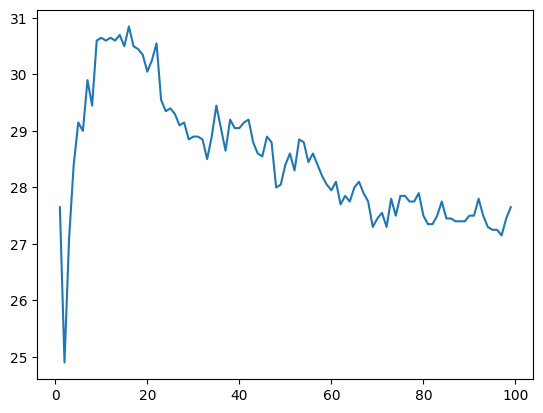

In [229]:
kk = np.arange(1,100)
plt.plot(kk, acc)
plt.show()

Поменяйте расстоянние L1 на L2 и сравните точность на всем датасете.

In [230]:
def distance_func_l2(a,b):
    r = (a-b)**2
    dist = (sum(r))**1/2
    return dist
def compute_L2(train, test,distance_func_l2):
    distances = [0]*test.shape[0]
    for i in tqdm(range(test.shape[0])):
      distances[i] = np.array([distance_func_l2(test[i,:], b) for b in train])
    return distances
distances = np.array(compute_L2(xtr, xte, distance_func_l2))

  0%|          | 0/2000 [00:00<?, ?it/s]

In [231]:
acc_l2 = []
for k in tqdm(range(1, 100)):
    acc_l2.append(get_accuracy(distances, y_train, y_test, k) * 100)

  0%|          | 0/99 [00:00<?, ?it/s]

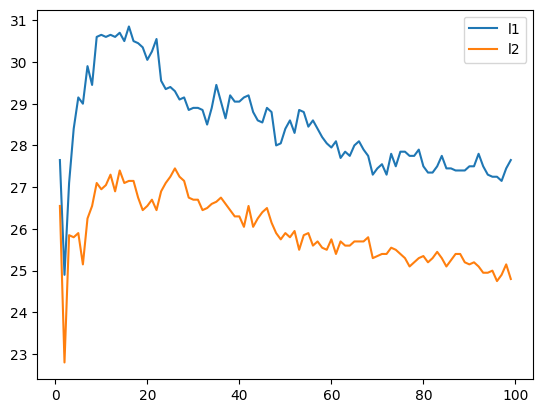

best k for l1 metric = 16
best k for l2 metric = 26


In [232]:
plt.plot(kk, acc)
plt.plot(kk, acc_l2)
plt.legend(['l1','l2'])
plt.show()
max_k_l1 = np.argmax(acc)+1
max_k_l2 = np.argmax(acc_l2)+1
print('best k for l1 metric =',max_k_l1)
print('best k for l2 metric =',max_k_l2)

### Формат результата

* График сравнения точности для L1 и L2 при различных k.
* Число k при котором достигается лучшая точность

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/Exercises/EX01/result_4_task.png" width="300">

### Задание 3 (EXTRA). Реализация kNN

Часто KNN реализуют в концепции Объектно-Ориентированного Программирования (ООП). Создайте класс kNN и реализуйте у него методы

In [233]:
class kNN:
    def __init__(self, k, distance_func):
        self.k = k
        self.distance_func = distance_func
        self.train_data = []
        self.train_labels = []

    def fit(self, x, y):
        self.train_data = x
        self.train_labels = y

    def predict(self, x):
        distances = self.compute_distances(x)
        indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels_of_top_classes = self.train_labels[indexes]
        predicted_class, _ = mode(labels_of_top_classes, axis=1)
        return predicted_class.flatten()

    def compute_distances(self, test):
        distances = [0]*test.shape[0]
        for i in tqdm(range(test.shape[0])):
          distances[i] = np.array([self.distance_func(test[i,:], b) for b in self.train_data])
        return distances

In [234]:
%%time
kNN_classifier = kNN(k=1, distance_func=compute_L1)
kNN_classifier.fit(x=xtr, y=y_train)
out = kNN_classifier.predict(xte)

  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 37min 24s, sys: 22.2 s, total: 37min 47s
Wall time: 37min 56s


In [235]:
acur = np.mean(y_test == out)
print(f'Accuracy = {acur * 100:.0f}%')

Accuracy = 28%


Сравните время работы вашей реализации и реализации из sklearn

In [236]:
from sklearn.neighbors import KNeighborsClassifier

In [237]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric = 'l1')
x_train_flatten = xtr
x_test_flatten = xte
neigh.fit(x_train_flatten, y_train)

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 12.2 ms


KNeighborsClassifier(metric='l1', n_neighbors=1)

In [238]:
# make prediction
preds = neigh.predict(x_test_flatten)

In [239]:
# compute accuracy
accur = np.mean(y_test == preds)
print(f'Accuracy = {accur * 100:.0f}%')

Accuracy = 28%


### Формат результата

Демонстрация времени работы вашей реализации и реализации из sklearn (с помощью %%time)

## SVM

### Задание 4. Классификация с помощью метода опорных векторов

In [240]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

**Снова будем работать с данными датасета adult.csv**

- Загружаем данные

In [241]:
df = pd.read_csv('adult.csv')
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

- Первичный анализ

In [242]:
print(df['age'].dtype)
print(df['age'].min(), df['age'].max())
df['age'] = df['age'].astype('int8')
print(df['age'].dtype)

int64
17 90
int8


In [243]:
print(df['fnlwgt'].dtype)
print(df['fnlwgt'].min(), df['fnlwgt'].max())
df['fnlwgt'] = df['fnlwgt'].astype('int32')
print(df['fnlwgt'].dtype)

int64
12285 1490400
int32


In [244]:
print(df['educational-num'].dtype)
print(df['educational-num'].min(), df['educational-num'].max())
df['educational-num'] = df['educational-num'].astype('int8')
print(df['educational-num'].dtype)

int64
1 16
int8


In [245]:
print(df['capital-gain'].dtype)
print(df['capital-gain'].min(), df['capital-gain'].max())
df['capital-gain'] = df['capital-gain'].astype('int32')
print(df['capital-gain'].dtype)

int64
0 99999
int32


In [246]:
print(df['capital-loss'].dtype)
print(df['capital-loss'].min(), df['capital-loss'].max())
df['capital-loss'] = df['capital-loss'].astype('int16')
print(df['capital-loss'].dtype)

int64
0 4356
int16


In [247]:
print(df['hours-per-week'].dtype)
print(df['hours-per-week'].min(), df['hours-per-week'].max())
df['hours-per-week'] = df['hours-per-week'].astype('int8')
print(df['hours-per-week'].dtype)

int64
1 99
int8


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int8  
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int32 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int8  
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int32 
 11  capital-loss     48842 non-null  int16 
 12  hours-per-week   48842 non-null  int8  
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int16(1), int32(2), int8(3), object(9)
memory usage: 4.0+ MB


Мы видим, что нет пропущенных значений

- Построение графиков

<Axes: xlabel='age', ylabel='Count'>

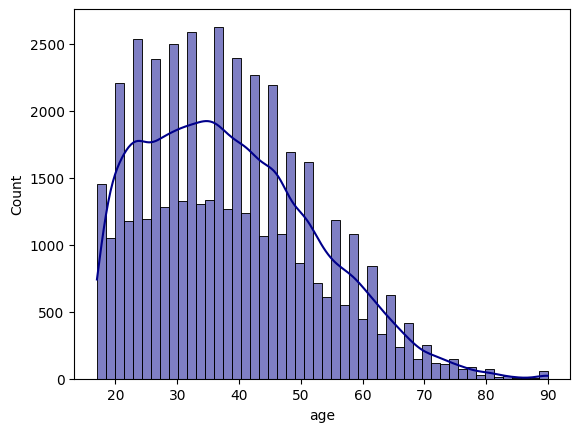

In [249]:
sns.histplot(df['age'], kde=True, bins=50, color = 'darkblue')

In [250]:
Q1 =  df['age'].quantile(q=0.025)
Q3 = df['age'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['age'] > (Q1-1.5*IQR)) & (df['age'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48842, 15)

<Axes: xlabel='fnlwgt', ylabel='Count'>

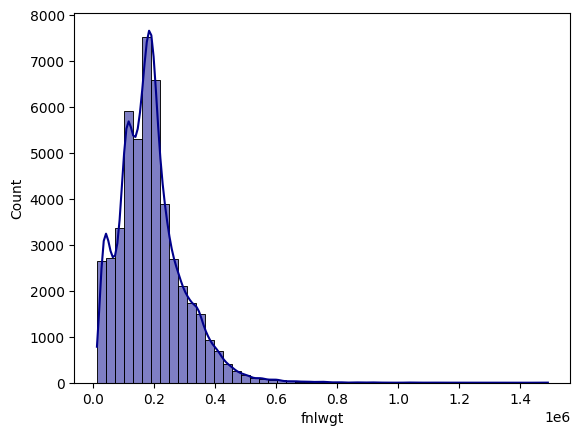

In [251]:
sns.histplot(df['fnlwgt'], kde=True, bins=50, color = 'darkblue')

In [252]:
Q1 =  df['fnlwgt'].quantile(q=0.025)
Q3 = df['fnlwgt'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['fnlwgt'] > (Q1-1.5*IQR)) & (df['fnlwgt'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48825, 15)

<Axes: xlabel='educational-num', ylabel='Count'>

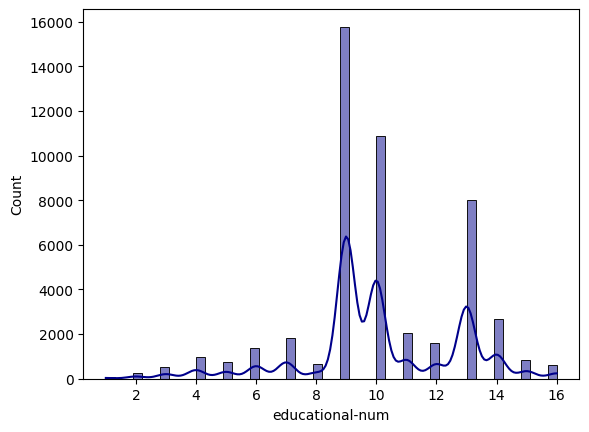

In [253]:
sns.histplot(df['educational-num'], kde=True, bins=50, color = 'darkblue')

In [254]:
Q1 =  df['educational-num'].quantile(q=0.025)
Q3 = df['educational-num'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['educational-num'] > (Q1-1.5*IQR)) & (df['educational-num'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48825, 15)

<Axes: xlabel='capital-gain', ylabel='Count'>

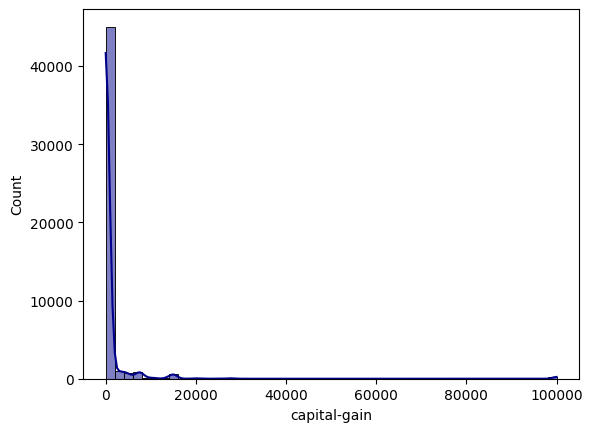

In [255]:
sns.histplot(df['capital-gain'], kde=True, bins=50, color = 'darkblue')

In [256]:
Q1 =  df['capital-gain'].quantile(q=0.025)
Q3 = df['capital-gain'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['capital-gain'] > (Q1-1.5*IQR)) & (df['capital-gain'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

<Axes: xlabel='capital-loss', ylabel='Count'>

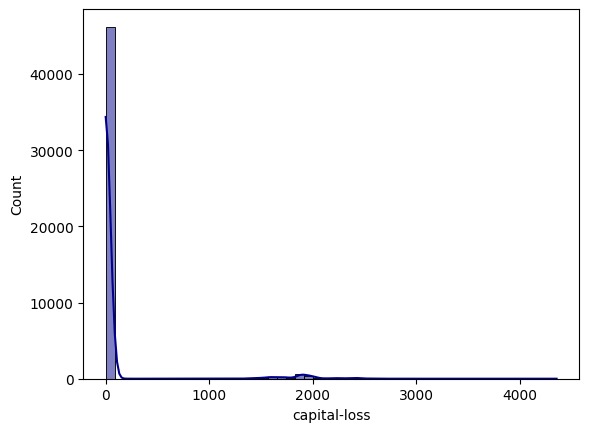

In [257]:
sns.histplot(df['capital-loss'], kde=True, bins=50, color = 'darkblue')

In [258]:
Q1 =  df['capital-loss'].quantile(q=0.025)
Q3 = df['capital-loss'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['capital-loss'] > (Q1-1.5*IQR)) & (df['capital-loss'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

<Axes: xlabel='hours-per-week', ylabel='Count'>

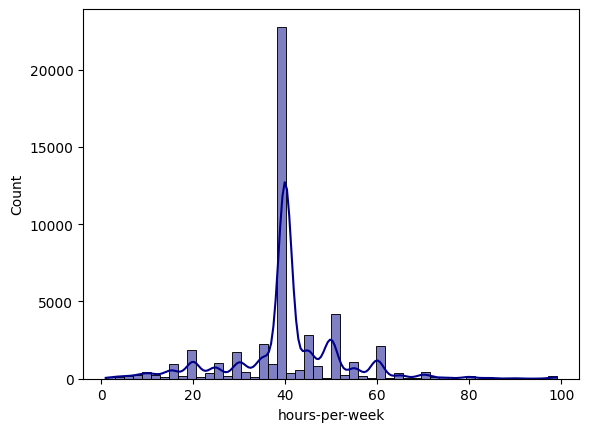

In [259]:
sns.histplot(df['hours-per-week'], kde=True, bins=50, color = 'darkblue')

In [260]:
Q1 =  df['hours-per-week'].quantile(q=0.025)
Q3 = df['hours-per-week'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['hours-per-week'] > (Q1-1.5*IQR)) & (df['hours-per-week'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

- Продобработка категориальных признаков

In [261]:
from sklearn.preprocessing import LabelEncoder

name = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
categorial_data = pd.DataFrame()
for i in name:
  categorial_data[i] = df[i]
# признаки name являются категориальными
# переведем значения этих столбцов в числа
le = LabelEncoder()
X = pd.DataFrame()
for i in name:
  le.fit(categorial_data[i])
  X[i] = le.transform(categorial_data[i])
df0 = df
for i in name:
  df0[i] = X[i]

<Axes: xlabel='workclass', ylabel='Count'>

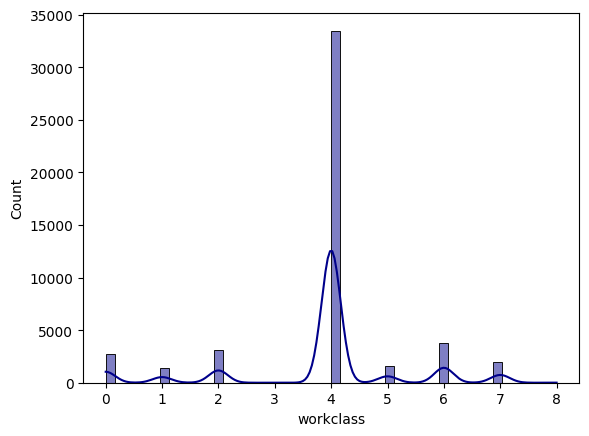

In [262]:
sns.histplot(df0['workclass'], kde=True, bins=50, color = 'darkblue')

In [263]:
Q1 =  df0['workclass'].quantile(q=0.025)
Q3 = df0['workclass'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['workclass'] > (Q1-1.5*IQR)) & (df0['workclass'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='education', ylabel='Count'>

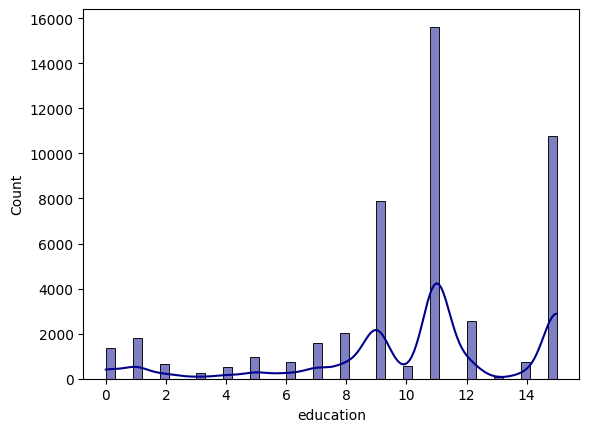

In [264]:
sns.histplot(df0['education'], kde=True, bins=50, color = 'darkblue')

In [265]:
Q1 =  df0['education'].quantile(q=0.025)
Q3 = df0['education'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['education'] > (Q1-1.5*IQR)) & (df0['education'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='marital-status', ylabel='Count'>

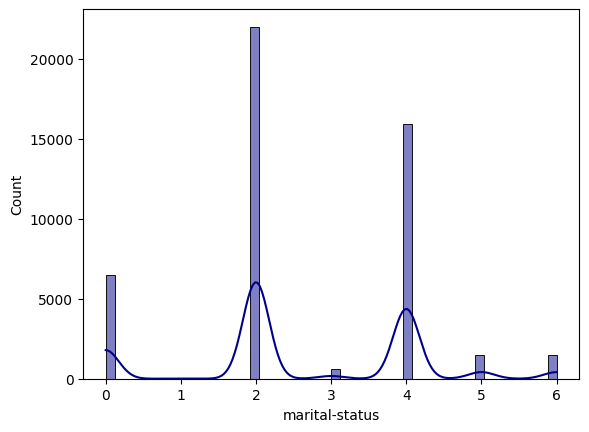

In [266]:
sns.histplot(df0['marital-status'], kde=True, bins=50, color = 'darkblue')

In [267]:
Q1 =  df0['marital-status'].quantile(q=0.025)
Q3 = df0['marital-status'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['marital-status'] > (Q1-1.5*IQR)) & (df0['marital-status'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='occupation', ylabel='Count'>

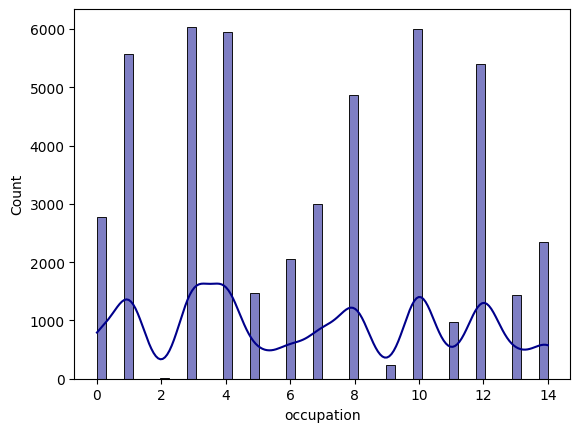

In [268]:
sns.histplot(df0['occupation'], kde=True, bins=50, color = 'darkblue')

In [269]:
Q1 =  df0['occupation'].quantile(q=0.025)
Q3 = df0['occupation'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['occupation'] > (Q1-1.5*IQR)) & (df0['occupation'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='relationship', ylabel='Count'>

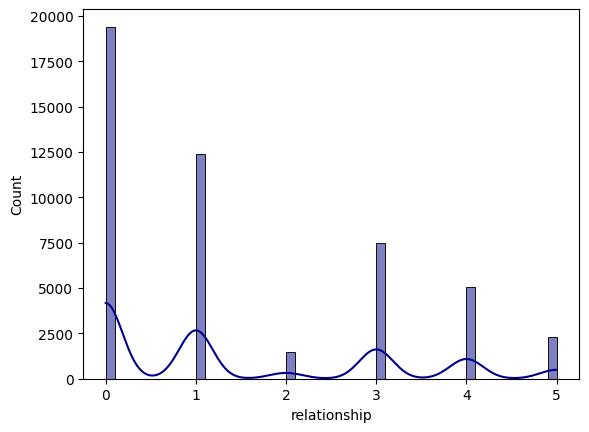

In [270]:
sns.histplot(df0['relationship'], kde=True, bins=50, color = 'darkblue')

In [271]:
Q1 =  df0['relationship'].quantile(q=0.025)
Q3 = df0['relationship'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['relationship'] > (Q1-1.5*IQR)) & (df0['relationship'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='race', ylabel='Count'>

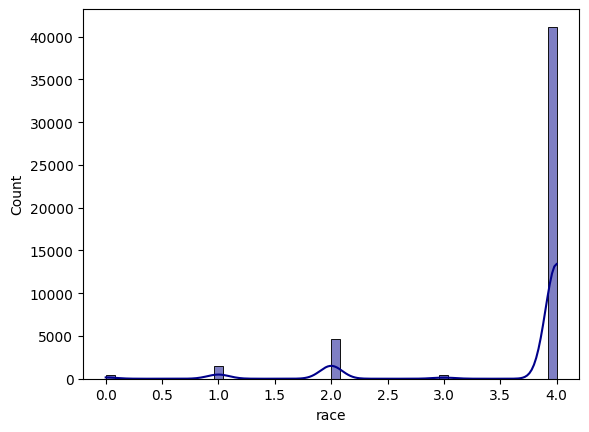

In [272]:
sns.histplot(df0['race'], kde=True, bins=50, color = 'darkblue')

In [273]:
Q1 =  df0['race'].quantile(q=0.025)
Q3 = df0['race'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['race'] > (Q1-1.5*IQR)) & (df0['race'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='gender', ylabel='Count'>

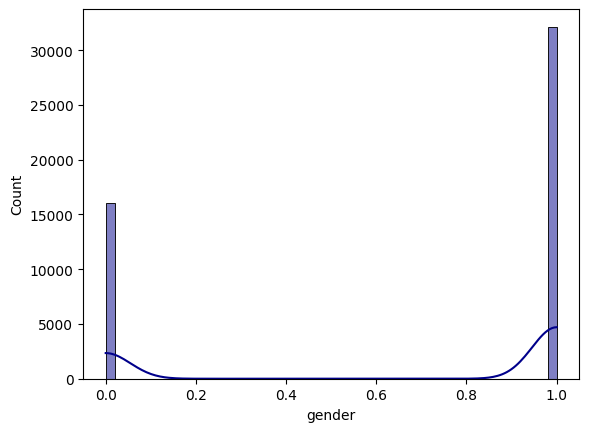

In [274]:
sns.histplot(df0['gender'], kde=True, bins=50, color = 'darkblue')

In [275]:
Q1 =  df0['gender'].quantile(q=0.025)
Q3 = df0['gender'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['gender'] > (Q1-1.5*IQR)) & (df0['gender'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='native-country', ylabel='Count'>

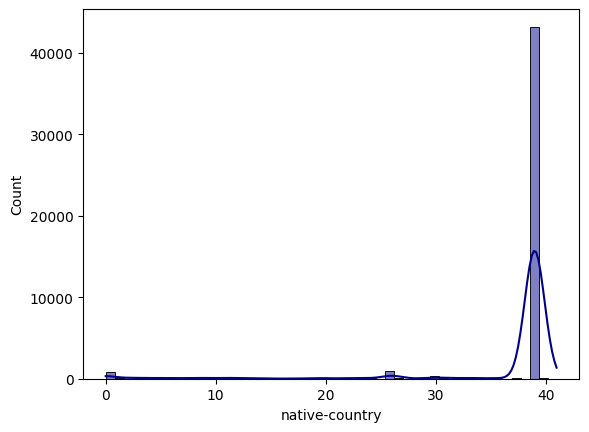

In [276]:
sns.histplot(df0['native-country'], kde=True, bins=50, color = 'darkblue')

In [277]:
Q1 =  df0['native-country'].quantile(q=0.025)
Q3 = df0['native-country'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['native-country'] > (Q1-1.5*IQR)) & (df0['native-country'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='income', ylabel='Count'>

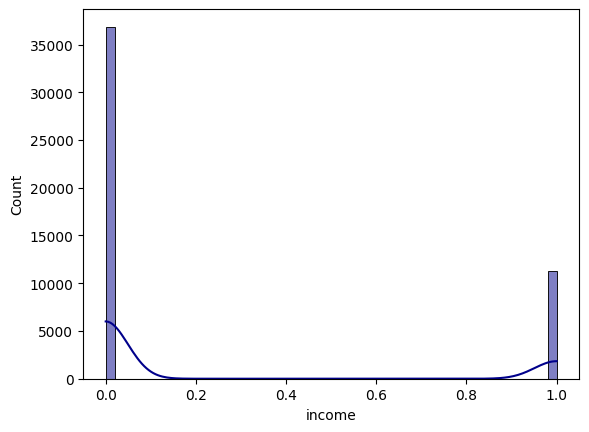

In [278]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df0['income'])
y = le.transform(df0['income'])
df0['income'] = y
sns.histplot(df0['income'], kde=True, bins=50, color = 'darkblue')

In [279]:
Q1 =  df0['income'].quantile(q=0.025)
Q3 = df0['income'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['income'] > (Q1-1.5*IQR)) & (df0['income'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

In [280]:
print(df0['workclass'].dtype)
print(df0['workclass'].min(), df0['workclass'].max())
df0['workclass'] = df0['workclass'].astype('int8')
print(df0['workclass'].dtype)

float64
0.0 8.0
int8


In [281]:
print(df0['education'].dtype)
print(df0['education'].min(), df0['education'].max())
df0['education'] = df0['education'].astype('int8')
print(df0['education'].dtype)

float64
0.0 15.0
int8


In [282]:
print(df0['marital-status'].dtype)
print(df0['marital-status'].min(), df0['marital-status'].max())
df0['marital-status'] = df0['marital-status'].astype('int8')
print(df0['marital-status'].dtype)

float64
0.0 6.0
int8


In [283]:
print(df0['occupation'].dtype)
print(df0['occupation'].min(), df0['occupation'].max())
df0['occupation'] = df0['occupation'].astype('int8')
print(df0['occupation'].dtype)

float64
0.0 14.0
int8


In [284]:
print(df0['relationship'].dtype)
print(df0['relationship'].min(), df0['relationship'].max())
df0['relationship'] = df0['relationship'].astype('int8')
print(df0['relationship'].dtype)

float64
0.0 5.0
int8


In [285]:
print(df0['race'].dtype)
print(df0['race'].min(), df0['race'].max())
df0['race'] = df0['race'].astype('int8')
print(df0['race'].dtype)

float64
0.0 4.0
int8


In [286]:
print(df0['gender'].dtype)
print(df0['gender'].min(), df0['gender'].max())
df0['gender'] = df0['gender'].astype('int8')
print(df0['gender'].dtype)

float64
0.0 1.0
int8


In [287]:
print(df0['native-country'].dtype)
print(df0['native-country'].min(), df0['native-country'].max())
df0['native-country'] = df0['native-country'].astype('int8')
print(df0['native-country'].dtype)

float64
0.0 41.0
int8


In [288]:
print(df0['income'].dtype)
print(df0['income'].min(), df0['income'].max())
df0['income'] = df0['income'].astype('int8')
print(df0['income'].dtype)

int64
0 1
int8


In [289]:
print(df0.info())
y = df0['income']
df0 = df0.drop(columns = 'income', axis = 1)
X = np.array(df0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48147 entries, 0 to 48492
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48147 non-null  int8 
 1   workclass        48147 non-null  int8 
 2   fnlwgt           48147 non-null  int32
 3   education        48147 non-null  int8 
 4   educational-num  48147 non-null  int8 
 5   marital-status   48147 non-null  int8 
 6   occupation       48147 non-null  int8 
 7   relationship     48147 non-null  int8 
 8   race             48147 non-null  int8 
 9   gender           48147 non-null  int8 
 10  capital-gain     48147 non-null  int32
 11  capital-loss     48147 non-null  int16
 12  hours-per-week   48147 non-null  int8 
 13  native-country   48147 non-null  int8 
 14  income           48147 non-null  int8 
dtypes: int16(1), int32(2), int8(12)
memory usage: 1.4 MB
None


- Разделим данные на обучающие и тестовы

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [291]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

- Обучите модели логиcтической регрессии и опорных векторов (SVC)

In [292]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
SVM = SVC()
SVM.fit(X_train, y_train)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

- Сделайте предикт обоими моделями на тесте и посмотрите качество обоих моделей

In [293]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
pred_SVM = SVM.predict(X_test)
pred_log = log_model.predict(X_test)

In [294]:
from sklearn.metrics import f1_score
acc_SVM = f1_score(y_test, pred_SVM)
acc_log = f1_score(y_test, pred_log)
print("f1_score SVM:", acc_SVM)
print("f1_score log:", acc_log)
from sklearn.metrics import roc_auc_score
racc_SVM = roc_auc_score(y_test, pred_SVM)
racc_log = roc_auc_score(y_test, pred_log)
print("roc_auc_score SVM:", racc_SVM)
print("roc_auc_score log:", racc_log)

f1_score SVM: 0.45723370429252774
f1_score log: 0.48540884137532503
roc_auc_score SVM: 0.6478214979381175
roc_auc_score log: 0.661403066824487


- Какая моджель лучше работает на этих данных?
- Почему и как это можно объяснить?
- Сделайте предположения\выводы

В данных присутсвует дисбаланс в классах, поэтому в качестве основной метрики был выбран ROC_AUC.

LogisticRegression сработала лучше на этих данных чем SVM.

Логистическая регрессия производит вероятностные значения, в то время как SVM выдает 1 или 0.

LR более чувствителен к выбросам, чем SVM, потому что функция потерь LR расходится быстрее, чем функция SVM. Возможно в данных остались выбросы, котрые LR определил правильно.

### Задание 5. SVM kernel trick

Данные не всегда могут быть хорошо разделены (гипер)плоскостью. Например, рассмотрим следующее: у нас есть данные по дозировке лекарства и 2 класса — пациенты, которые поправились, и те, которым лучше не стало.

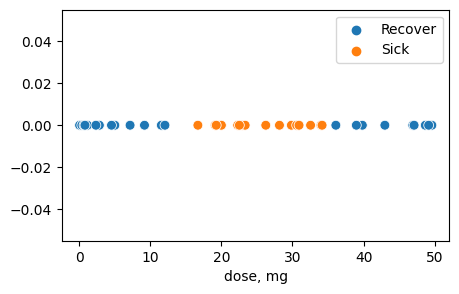

In [295]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


def generate_patients_data(total_len=40):
    x = np.random.uniform(0, 50, total_len)
    y = np.zeros_like(x)
    y[(x > 15) & (x < 35)] = 1
    return x, y


def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="dose, mg")
    return ax


total_len = 40
x, y = generate_patients_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)
plt.show()

Соответственно, мы не можем найти такое пороговое значение, которое будет разделять наши классы на больных и здоровых, а, следовательно, и Support Vector Classifier работать тоже не будет.  Для начала давайте преобразуем наши данные таким образом, чтобы они стали 2-хмерными. В качестве значений по оси Y будем использовать дозу, возведенную в квадрат (**доза**$^2$).

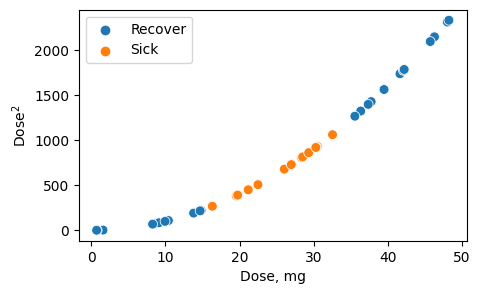

In [296]:
def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x[0, :], y=x[1, :], hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="Dose, mg")
    ax.set(ylabel="Dose$^2$")
    return ax


total_len = 40
x_1, y = generate_patients_data(total_len=total_len)
x_2 = x_1**2

x1 = np.vstack([x_1, x_2])
plot_data(x1, y, total_len=40, s=50)
plt.show()

Теперь мы можем вновь использовать Support Vector Classifier для классификации

In [297]:
from sklearn.svm import SVC
SVC1 = SVC()
SVC_1 = SVC()
a = [0]*len(x_1)
x = np.concatenate (([x_1], [a]), axis= 0 )
# fit the model on raw and on squared data
SVC1.fit(x1.T, y)
pre_squarred = SVC1.predict(x1.T)
SVC_1.fit(x.T, y)
pred_lin = SVC_1.predict(x.T)

 - Сравните качество моделей на сырых данных, и линейно разделимыхъ после квадратичного преобразования

In [298]:
acc_lin = f1_score(y, pred_lin)
acc_squared = f1_score(y, pre_squarred)
print(acc_lin)
print(acc_squared)

0.9142857142857143
0.967741935483871


Но тут возникает резонный вопрос: почему мы решили возвести в квадрат? Почему не в куб? Или, наоборот, не извлечь корень? Как нам решить, какое преобразование использовать?

И у нас есть **вторая проблема** — а если перейти надо в пространство очень большой размерности? В этом случае наши данные очень сильно увеличатся в размере.

Комбинация двух проблем дает нам **много сложности**: надо перебирать большое число возможных пространств большей размерности


Однако основная фишка Support Vector Machine состоит в том, что внутри он работает на скалярных произведениях. И можно эти скалярные произведения считать, **не переходя в пространство большей размерности**

Для этого SVM использует **Kernel Function**.

Kernel Function может, например, быть полиномом (**Polynomial Kernel Function**), который имеет параметр $d$ — сколько размерностей выбрать.


<img src="https://edunet.kea.su/repo/EduNet-content/L02/out/svm_kernel_function.png" width="700">


- инициализируйте модель SVM с параметром kernel = rbf и обучите ее на сырых, линейно неразделимых данных (x1, y):

In [299]:
SVM_kernel = SVC(kernel='rbf')
# fit the model
SVM_kernel.fit(x.T, y)
pred_rbf = SVM_kernel.predict(x.T)
acc_rbf = f1_score(y, pred_rbf)
print(acc_rbf)

0.9142857142857143


- Напишите ыводы о важности параметра kernel

SVM может проверять пространства признаков бесконечного размера, если для такого пространства существует kernel function. Для решения практических задач иногда такие бесконечномерные пространства признаков могут оказаться удобными. Широко применяемое на практике RFB ядро как раз соответствует такому случаю бесконечномерного пространства признаков.